In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from loguru import logger
import numpy as np
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [ ]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811.csv"
)

df_exo = pd.read_csv(file_path)

# load /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20241017e.csv as well
# and concat the databases

# df_ss = pd.read_csv(
#     "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20241017e.csv"
# )
# # take only the systems with hostname equal to "SSE"
# df_ss = df_ss[df_ss.hostname.isin(["SSE"])]

df_fake = pd.read_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_fakes.csv"
)
# take only those where the hostname ends with one or multiple "x"
# df_fake = df_fake[df_fake.hostname.str.endswith("x")]

# df_exo = pd.concat([df_exo, df_ss, df_fake], ignore_index=True)
df_exo = pd.concat([df_exo, df_fake], ignore_index=True)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic' '55 Cncx' 'GJ 876x'
 'HD 110067x' 'HD 191939x' 'KOI-351x' 'TOI-942x' 'TOI-942xx' 'TOI-942xxx'
 'TRAPPIST-1x' 'SSE' 'SSEn']
29
sy_pnum
2    13
3     3
4     3
5     2
6     3
7     1
8     4
Name: hostname, dtype: int64


In [30]:
df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp.csv"
)

2025-08-13 22:51:23.811 | INFO     | exonamd.run:interp_db:170 - Thinning down the data with nanmedian
2025-08-13 22:51:23.814 | WARNING  | exonamd.run:interp_db:173 - NaT values in rowupdate: 83
2025-08-13 22:51:23.832 | INFO     | exonamd.run:interp_db:182 - Data thinned down
2025-08-13 22:51:23.833 | INFO     | exonamd.run:interp_db:184 - Checking for duplicates
2025-08-13 22:51:23.837 | INFO     | exonamd.run:interp_db:192 - No duplicates found
2025-08-13 22:51:23.838 | INFO     | exonamd.run:interp_db:194 - Instantiating the flags
2025-08-13 22:51:23.839 | INFO     | exonamd.run:interp_db:196 - Flags instantiated
2025-08-13 22:51:23.840 | INFO     | exonamd.run:interp_db:198 - Interpolating missing eccentricity values


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

2025-08-13 22:51:23.896 | INFO     | exonamd.run:interp_db:207 - Values interpolated
2025-08-13 22:51:23.898 | INFO     | exonamd.run:interp_db:209 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

2025-08-13 22:51:25.497 | INFO     | exonamd.run:interp_db:218 - Values interpolated
2025-08-13 22:51:25.499 | DEBUG    | exonamd.run:interp_db:220 - Dropping columns that are no longer needed
2025-08-13 22:51:25.501 | DEBUG    | exonamd.run:interp_db:222 - Columns dropped
2025-08-13 22:51:25.501 | INFO     | exonamd.run:interp_db:224 - Removing systems where at least one planet has no mass or semi-major axis
2025-08-13 22:51:25.518 | INFO     | exonamd.run:interp_db:233 - Removing 1 systems: ['KOI-351x']
2025-08-13 22:51:25.520 | INFO     | exonamd.run:interp_db:235 - Systems removed
2025-08-13 22:51:25.520 | INFO     | exonamd.run:interp_db:237 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-13 22:51:25.711 | INFO     | exonamd.run:interp_db:246 - Values interpolated
2025-08-13 22:51:25.712 | INFO     | exonamd.run:interp_db:248 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-13 22:51:25.764 | INFO     | exonamd.run:interp_db:256 - Values interpolated
2025-08-13 22:51:25.765 | INFO     | exonamd.run:interp_db:259 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-13 22:51:25.939 | INFO     | exonamd.run:interp_db:267 - Values computed
2025-08-13 22:51:25.940 | INFO     | exonamd.run:interp_db:269 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-13 22:51:26.159 | INFO     | exonamd.run:interp_db:278 - Values interpolated
2025-08-13 22:51:26.161 | INFO     | exonamd.run:interp_db:281 - Storing the curated+interpolated database
2025-08-13 22:51:26.165 | INFO     | exonamd.run:interp_db:286 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp.csv


2025-08-13 22:51:27.474 | DEBUG    | exonamd.run:calc_namd:331 - Dropping columns that are no longer needed
2025-08-13 22:51:27.477 | DEBUG    | exonamd.run:calc_namd:333 - Columns dropped
2025-08-13 22:51:27.478 | INFO     | exonamd.run:calc_namd:342 - Computing the relative NAMD
2025-08-13 22:51:27.549 | INFO     | exonamd.run:calc_namd:350 - Relative NAMD computed
2025-08-13 22:51:27.551 | INFO     | exonamd.run:calc_namd:353 - Computing the absolute NAMD
2025-08-13 22:51:27.620 | INFO     | exonamd.run:calc_namd:361 - Absolute NAMD computed
2025-08-13 22:51:27.686 | INFO     | exonamd.run:calc_namd:441 - Computing the Monte Carlo relative NAMD


2025-08-13 22:51:32.350 | INFO     | exonamd.run:calc_namd:452 - Relative NAMD computed
2025-08-13 22:51:32.353 | INFO     | exonamd.run:calc_namd:455 - Computing the Monte Carlo absolute NAMD
2025-08-13 22:51:37.254 | INFO     | exonamd.run:calc_namd:466 - Absolute NAMD computed


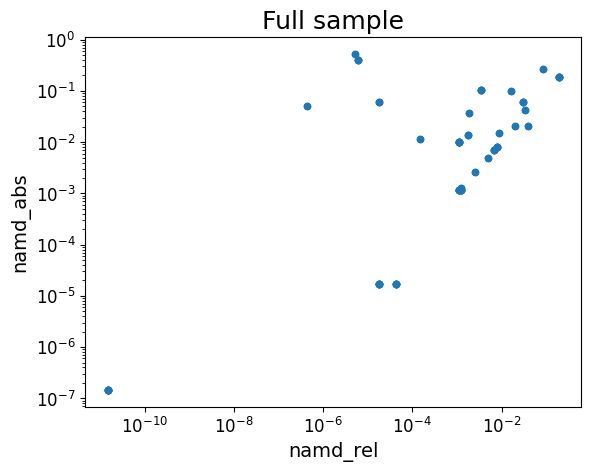

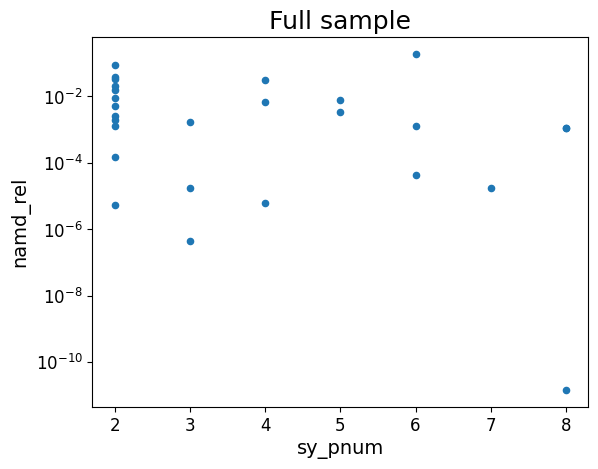

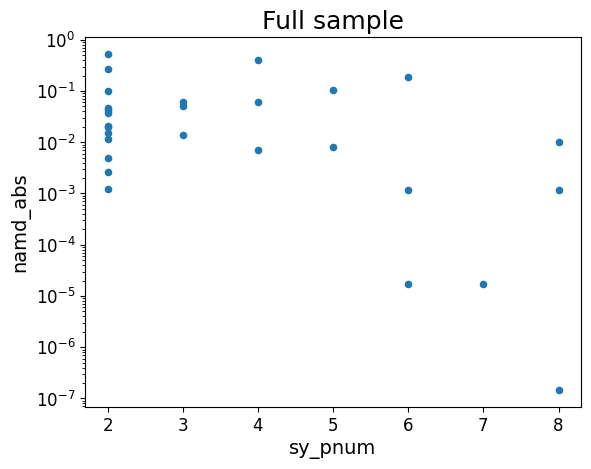

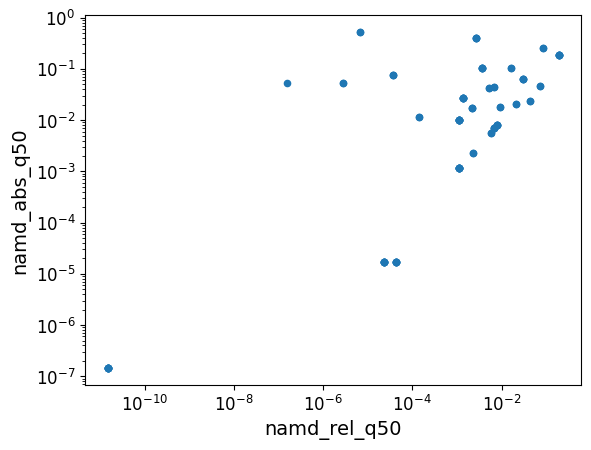

In [31]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    # which=["rel"],
    # which=["abs"],
    which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e5),
)

In [41]:
df_namd[~df_namd.hostname.isin(df_fake.hostname.unique())].hostname.nunique()

18

2025-08-13 22:54:14.371 | INFO     | __main__:<module>:4 - Plotting the absolute NAMD vs. multiplicity


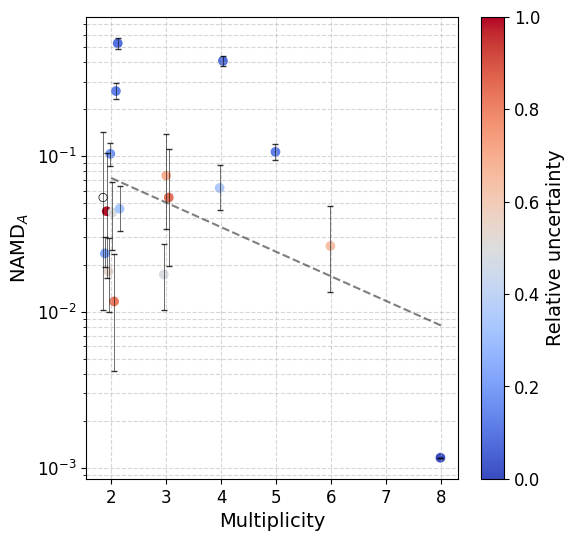

2025-08-13 22:54:14.966 | INFO     | __main__:<module>:18 - Plot done


In [37]:
# for this figure we need to define df_namd_ without systems with hostname in df_fake
df_namd_ = df_namd[~df_namd.hostname.isin(df_fake.hostname.unique())]

logger.info("Plotting the absolute NAMD vs. multiplicity")
pop_plot(
    df=df_namd_.groupby("hostname").apply(
        lambda g: g.select_dtypes(exclude=["object"]).mean(),
        include_groups=False,
    ),
    kind="abs",
    # title="Core planets",
    which="namd",
    yscale="log",
    outpath="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/notebook/plots/exo_namd_abs_paper.pdf",
    replace_nan=False,
    xoffs=0.15,
)
logger.info("Plot done")

In [38]:
print(df_namd_.hostname.nunique())
print(df_namd_.groupby("sy_pnum").hostname.nunique())

18
sy_pnum
2    10
3     3
4     2
5     1
6     1
8     1
Name: hostname, dtype: int64


In [39]:
df_namd.hostname.unique()

array(['55 Cncx', 'AU Mic', 'GJ 876x', 'HD 110067x', 'HD 118203',
       'HD 191939x', 'HD 3167', 'HIP 41378', 'K2-290', 'Kepler-462',
       'Kepler-56', 'SS', 'SSE', 'SSEn', 'TOI-1136', 'TOI-2076',
       'TOI-2202', 'TOI-421', 'TOI-451', 'TOI-5398', 'TOI-942',
       'TOI-942x', 'TOI-942xx', 'TOI-942xxx', 'TRAPPIST-1x', 'WASP-148',
       'WASP-47', 'WASP-84'], dtype=object)

In [42]:
df_namd_plot = (
    df_namd_.groupby("hostname")[
        [
            "namd_rel",
            "namd_abs",
            "namd_rel_q16",
            "namd_rel_q50",
            "namd_rel_q84",
            "namd_abs_q16",
            "namd_abs_q50",
            "namd_abs_q84",
        ]
    ]
    .apply(lambda g: g.select_dtypes(exclude=["object"]).mean())
)

df_namd_fake = (
    df_namd[df_namd.hostname.isin(df_fake.hostname.unique())]
    .groupby("hostname")[
        [
            "namd_rel",
            "namd_abs",
            "namd_rel_q16",
            "namd_rel_q50",
            "namd_rel_q84",
            "namd_abs_q16",
            "namd_abs_q50",
            "namd_abs_q84",
        ]
    ]
    .apply(lambda g: g.select_dtypes(exclude=["object"]).mean())
)

print(len(df_namd_plot), len(df_namd_fake))

18 10


In [43]:
df_namd_fake

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
55 Cncx,8.035724e-03,8.035726e-03,5.865267e-03,8.121633e-03,1.076093e-02,5.798102e-03,8.078829e-03,1.069642e-02
GJ 876x,6.951919e-03,6.951921e-03,6.885083e-03,6.957079e-03,7.030461e-03,6.885390e-03,6.957009e-03,7.030964e-03
HD 110067x,4.233427e-05,1.709887e-05,3.821328e-05,4.359478e-05,4.988294e-05,1.709887e-05,1.709887e-05,1.709887e-05
HD 191939x,1.897625e-01,1.897618e-01,1.897691e-01,1.897938e-01,1.898799e-01,1.897611e-01,1.897619e-01,1.897628e-01
SSE,1.141626e-03,1.012178e-02,1.141626e-03,1.141626e-03,1.141626e-03,1.012178e-02,1.012178e-02,1.012178e-02
SSEn,1.458319e-11,1.465562e-07,1.458316e-11,1.458319e-11,1.458322e-11,1.465562e-07,1.465562e-07,1.465562e-07
TOI-942x,2.020410e-02,2.020410e-02,1.376272e-02,2.074594e-02,2.939845e-02,1.367952e-02,2.072795e-02,2.938412e-02
TOI-942xx,5.012563e-03,5.012563e-03,2.593460e-03,5.681953e-03,1.030479e-02,2.590508e-03,5.701768e-03,1.028566e-02
TOI-942xxx,1.250782e-03,1.250782e-03,7.378659e-04,2.261778e-03,5.075177e-03,7.373264e-04,2.267452e-03,5.094824e-03


0


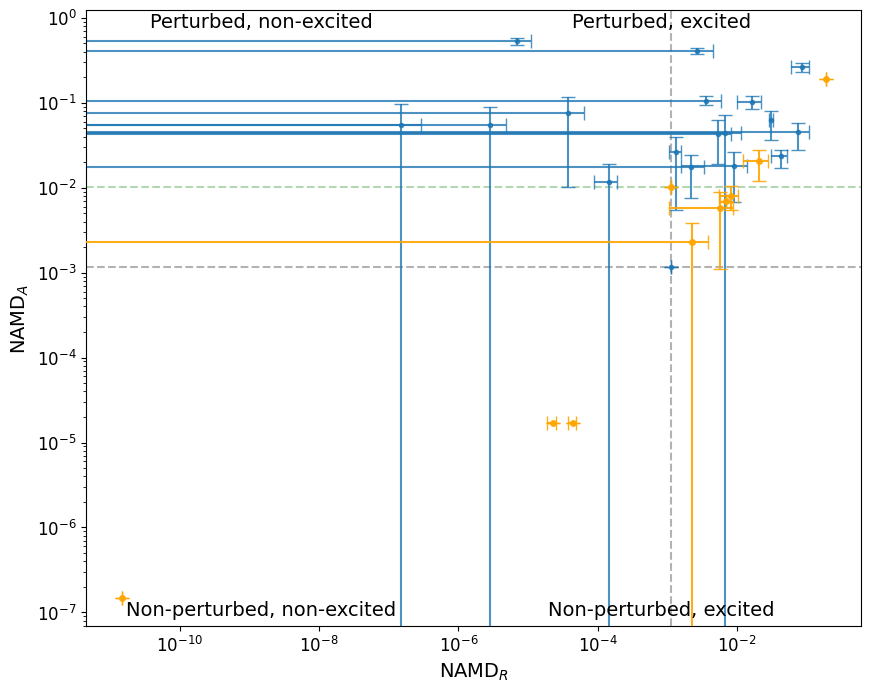

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"NAMD$_R$")
plt.ylabel(r"NAMD$_A$")

# plt.plot(
#     df_namd_plot["namd_rel"],
#     df_namd_plot["namd_abs"],
#     "s",
#     color="C1",
#     alpha=0.7,
# )

plt.errorbar(
    x=df_namd_plot["namd_rel_q50"],
    y=df_namd_plot["namd_abs_q50"],
    xerr=(
        df_namd_plot["namd_rel_q84"] - df_namd_plot["namd_rel_q50"],
        df_namd_plot["namd_rel_q50"] - df_namd_plot["namd_rel_q16"],
    ),
    yerr=(
        df_namd_plot["namd_abs_q84"] - df_namd_plot["namd_abs_q50"],
        df_namd_plot["namd_abs_q50"] - df_namd_plot["namd_abs_q16"],
    ),
    fmt="o",
    markersize=3,
    capsize=5,
    alpha=0.8,
)

plt.errorbar(
    x=df_namd_fake["namd_rel_q50"],
    y=df_namd_fake["namd_abs_q50"],
    xerr=(
        df_namd_fake["namd_rel_q84"] - df_namd_fake["namd_rel_q50"],
        df_namd_fake["namd_rel_q50"] - df_namd_fake["namd_rel_q16"],
    ),
    yerr=(
        df_namd_fake["namd_abs_q84"] - df_namd_fake["namd_abs_q50"],
        df_namd_fake["namd_abs_q50"] - df_namd_fake["namd_abs_q16"],
    ),
    fmt="o",
    markersize=4,
    capsize=5,
    alpha=0.9,
    zorder=10,
    color="orange",
)

# SS = df_namd_plot[df_namd_plot.index == "SS"]

# plt.errorbar(
#     x=SS["namd_rel_q50"],
#     y=SS["namd_abs_q50"],
#     xerr=(
#         SS["namd_rel_q84"] - SS["namd_rel_q50"],
#         SS["namd_rel_q50"] - SS["namd_rel_q16"],
#     ),
#     yerr=(
#         SS["namd_abs_q84"] - SS["namd_abs_q50"],
#         SS["namd_abs_q50"] - SS["namd_abs_q16"],
#     ),
#     fmt="o",
#     markersize=3,
#     capsize=5,
#     alpha=0.5,
#     color="r",
# )

missing_mc = df_namd_plot[
    np.logical_or(
        df_namd_plot["namd_abs_q50"].isna(), df_namd_plot["namd_rel_q50"].isna()
    )
]
print(len(missing_mc))

plt.plot(
    missing_mc["namd_rel"],
    missing_mc["namd_abs"],
    "o",
    color="k",
    alpha=0.5,
    markersize=3,
)

ymin = 1e-7
ymax = 1
xmin = 1e-7
xmax = 1

xmin=xmax=ymin=ymax=None

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.vlines(1.3e-3, *plt.ylim(), colors=["k"], linestyles=["--"])
# plt.hlines(1.3e-3, *plt.xlim(), colors=["k"], linestyles=["--"])

plt.vlines(
    df_namd_plot.loc["SS"]["namd_rel"],
    *plt.ylim(),
    colors=["k"],
    linestyles=["--"],
    alpha=0.3,
    zorder=0
)
plt.hlines(
    df_namd_plot.loc["SS"]["namd_abs"],
    *plt.xlim(),
    colors=["k"],
    linestyles=["--"],
    alpha=0.3,
    zorder=0
)

# plt.vlines(df_namd_ss.loc["SSE"]["namd_rel"], *plt.ylim(), colors=["b"], linestyles=["--"], alpha=0.3, zorder=0)
plt.hlines(
    df_namd_fake.loc["SSE"]["namd_abs"],
    *plt.xlim(),
    colors=["g"],
    linestyles=["--"],
    alpha=0.3,
    zorder=0
)

fig.text(0.3, 0.865, "Perturbed, non-excited", ha="center", va="center")
fig.text(0.7, 0.865, "Perturbed, excited", ha="center", va="center")

fig.text(0.3, 0.13, "Non-perturbed, non-excited", ha="center", va="center")
fig.text(0.7, 0.13, "Non-perturbed, excited", ha="center", va="center")

plt.show()

In [45]:
# sort df_namd_fake by the namd_rel_q50
df_namd_fake.sort_values("namd_rel_q50")

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
SSEn,1.458319e-11,1.465562e-07,1.458316e-11,1.458319e-11,1.458322e-11,1.465562e-07,1.465562e-07,1.465562e-07
TRAPPIST-1x,1.754423e-05,1.709887e-05,2.015108e-05,2.263524e-05,2.634758e-05,1.709887e-05,1.709887e-05,1.709887e-05
HD 110067x,4.233427e-05,1.709887e-05,3.821328e-05,4.359478e-05,4.988294e-05,1.709887e-05,1.709887e-05,1.709887e-05
SSE,1.141626e-03,1.012178e-02,1.141626e-03,1.141626e-03,1.141626e-03,1.012178e-02,1.012178e-02,1.012178e-02
TOI-942xxx,1.250782e-03,1.250782e-03,7.378659e-04,2.261778e-03,5.075177e-03,7.373264e-04,2.267452e-03,5.094824e-03
TOI-942xx,5.012563e-03,5.012563e-03,2.593460e-03,5.681953e-03,1.030479e-02,2.590508e-03,5.701768e-03,1.028566e-02
GJ 876x,6.951919e-03,6.951921e-03,6.885083e-03,6.957079e-03,7.030461e-03,6.885390e-03,6.957009e-03,7.030964e-03
55 Cncx,8.035724e-03,8.035726e-03,5.865267e-03,8.121633e-03,1.076093e-02,5.798102e-03,8.078829e-03,1.069642e-02
TOI-942x,2.020410e-02,2.020410e-02,1.376272e-02,2.074594e-02,2.939845e-02,1.367952e-02,2.072795e-02,2.938412e-02


2025-08-12 22:36:05.799 | INFO     | __main__:<module>:7 - Selecting the host: K2-290
2025-08-12 22:36:05.804 | INFO     | __main__:<module>:9 - Host selected
2025-08-12 22:36:05.806 | INFO     | __main__:<module>:11 - Computing the Monte Carlo relative NAMD
2025-08-12 22:36:05.839 | INFO     | __main__:<module>:20 - Values computed
2025-08-12 22:36:05.840 | INFO     | __main__:<module>:23 - Plotting the relative NAMD distribution


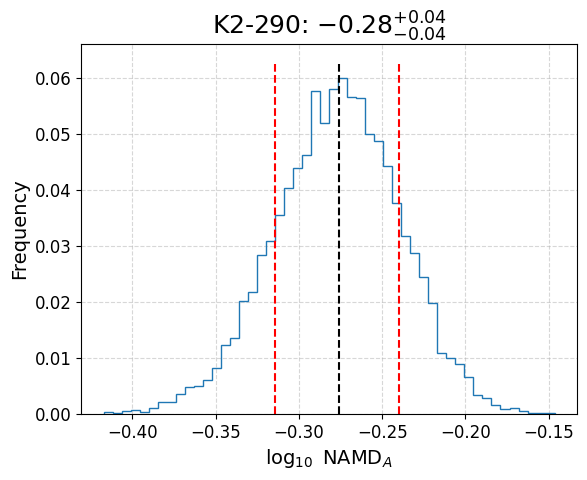

2025-08-12 22:36:05.994 | INFO     | __main__:<module>:32 - Plot done


In [13]:
# Task 1: sample the NAMD for a given host
hostname = "K2-290"
kind = "abs"
Npt = int(1e4)
threshold = 100

logger.info(f"Selecting the host: {hostname}")
host = df_namd[df_namd["hostname"] == hostname]
logger.info("Host selected")

logger.info("Computing the Monte Carlo relative NAMD")
retval = solve_namd_mc(
    host=host,
    kind=f"{kind}",
    Npt=Npt,
    threshold=threshold,
    full=True,
    use_trunc_normal=True,
)
logger.info("Values computed")

# Task 2: plot the NAMD for a given host
logger.info("Plotting the relative NAMD distribution")
simple_plot(
    df=retval,
    kind=f"{kind}",
    title=hostname,
    which="namd",
    scale="log",
    # outpath=outpath,
)
logger.info("Plot done")

In [12]:
df_namd[df_namd["hostname"] == hostname].to_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/deleteme.csv",
    index=False,
)